In [1]:
# Eliriana Lleshi
# Homework 4 Part 1


%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from numpy import *
from numpy.polynomial import *
from scipy.interpolate import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

np.random.seed(123)
x = np.linspace(-5,20,600)
sigma = 10

In [2]:
### a

def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

In [3]:
y = curve_generator(x, sigma)

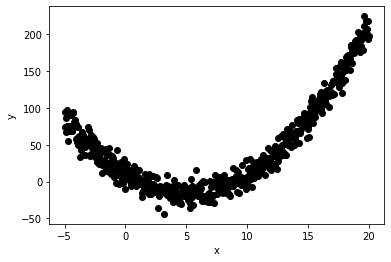

In [4]:
plt.scatter(x, y,  color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(402,)
(198,)
(402,)
(198,)


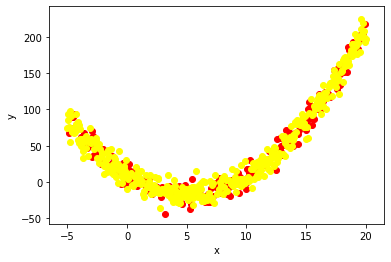

In [6]:
plt.scatter(X_test, Y_test,  color='red')
plt.scatter(X_train, Y_train,  color='yellow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
### b

def calc_RMSE(X_train, Y_train, X_test, Y_test, degree):
    #fits model and returns the train error(RMSE) and validation error(RMSE)
    model = polyfit(X_train,Y_train,degree)
    train_predictions = polyval(model,X_train)
    mse = mean_squared_error(Y_train, train_predictions)
    train_RMSE = np.sqrt(mse)
    test_predictions = polyval(model,X_test)
    mse = mean_squared_error(Y_test, test_predictions)
    rmse = np.sqrt(mse)
    test_RMSE = np.sqrt(mse)
    return train_RMSE, test_RMSE

In [8]:
df_degree = pd.DataFrame(columns=['degree', 'train_RMSE', 'test_RMSE'])
for degree in range(0, 21):
    train_RMSE, test_RMSE = calc_RMSE(X_train, Y_train, X_test, Y_test,  degree)
    df_degree.loc[degree] = [degree,train_RMSE,test_RMSE]

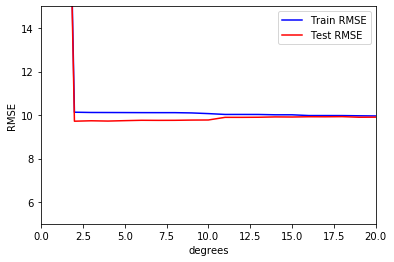

In [9]:
plt.plot(df_degree.degree, df_degree.train_RMSE, 'b', label='Train RMSE')
plt.plot(df_degree.degree, df_degree.test_RMSE, 'r', label='Test RMSE')
plt.xlabel('degrees')
plt.ylabel('RMSE')
plt.legend()
plt.xlim(0,20)
plt.ylim(5,15)
plt.show()

In [10]:
### Observation: RMSE is large when the degree is less than 2 and then doesn't change over range 2 to 20. 
###              The train and test RMSE are nearly identical for degrees greater than 2, so
###              higher degrees add to the fitting accuracy but the difference is seen mostly in the range 0 to 2.
###              Degrees of less than 2 are underfitted and have high bias, as no linear equation can 
###              encapsulate the data points from the previous graph without high error. The reason there
###              is not much of a difference from degrees 2 to 20 is because there aren't really 
###              outliers on this dataset (all within sigma), so the error doesn't suffer from overfitting for 
###              high degrees. 

In [11]:
### c

def test_size_RMSE(x, y, size, degree):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=size, random_state = 5)
    return calc_RMSE(X_train, Y_train, X_test, Y_test, degree)

In [12]:
deg_test = [1,2,5,10]
df_test_size = pd.DataFrame(columns=['degree', 'test_size', 'train_RMSE', 'test_RMSE'])

ind = 0
size =0.1
while size < .9:
    i=0
    while i < 4:
        degree = deg_test[i]
        train_RMSE, test_RMSE = test_size_RMSE(x, y, size, degree)
        df_test_size.loc[ind] = [degree,size,train_RMSE,test_RMSE]
        ind = ind + 1
        i = i + 1
    size = size  + 0.1    
        

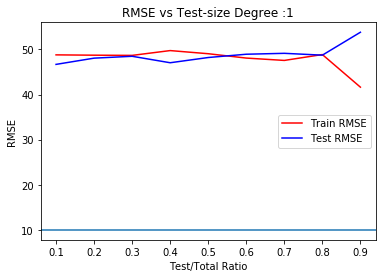

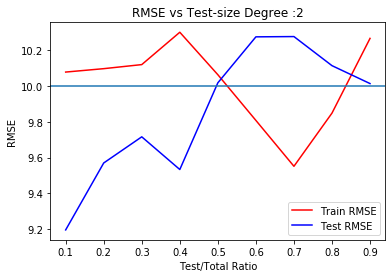

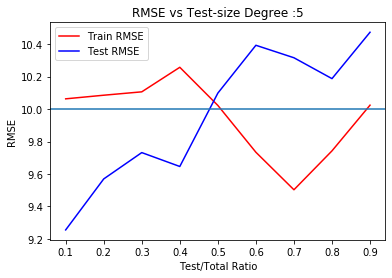

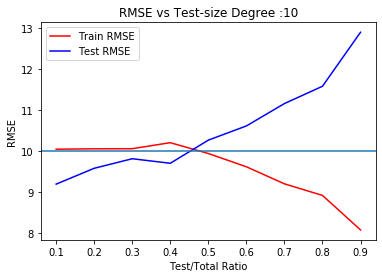

In [13]:
i=0
while i < 4:
    degree = deg_test[i]
    tempf = df_test_size.query('degree ==' +str(degree))
    plt.plot(tempf.test_size,  tempf.train_RMSE, 'r', label='Train RMSE')
    plt.plot(tempf.test_size, tempf.test_RMSE, 'b',label='Test RMSE')
    plt.axhline(y=sigma)
    plt.title('RMSE vs Test-size Degree :'+ str(degree))
    plt.xlabel("Test/Total Ratio")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    i = i + 1

In [14]:
### Observations: Once again we observe that the RMSE is quite high for degrees less than 2, as linear can't work on this
###               dataset regardless of test set size. 
###               In general as the size of the training set increases, the RMSE for the test set decreases above sigma.
###               When the training set is at least .5 of the data, the test set always has an RMSE of about 
###               sigma for all degrees except 2, which is a small error. When there is overfitting (in Degrees 5 and 10)
###               having a small training set leads the test set to have a high validation error, as the function hardly learned. 